### Sigma Technique (Standard Deviation)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd 
 


In [21]:
df = pd.read_csv("C:\\Users\\thapa\\OneDrive\\Desktop\\EDA-with-Satyajit-Pattnaik\\Data\\raw_sales.csv")

In [22]:
df.head(5)

datesold  postcode   price propertyType  bedrooms
0  2007-02-07 00:00:00      2607  525000        house         4
1  2007-02-27 00:00:00      2906  290000        house         3
2  2007-03-07 00:00:00      2905  328000        house         3
3  2007-03-09 00:00:00      2905  380000        house         4
4  2007-03-21 00:00:00      2906  310000        house         3

In [23]:
# FUnction to Detection Outlier on one dimensional datasets:

def find_anamolies(data):
    anamolies = []

    # Set upper snd lower limit to 3 Standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)

    # 3-standard devaition 

    anamoly_cut_off = random_data_std * 3

    lower_limit = random_data_mean - anamoly_cut_off
    upper_limit = random_data_mean + anamoly_cut_off

    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anamolies.append(outlier)
        return anamolies 

In [24]:
df.price

0        525000
1        290000
2        328000
3        380000
4        310000
          ...  
29575    500000
29576    560000
29577    464950
29578    589000
29579    775000
Name: price, Length: 29580, dtype: int64

In [25]:
list_1 = find_anamolies(df['price'])

In [26]:
len(df)

29580

In [27]:
len(list_1)

0

In [28]:
df.price.skew()

np.float64(4.312009366902366)

In [29]:
import seaborn as sns

<Axes: xlabel='price', ylabel='Density'>

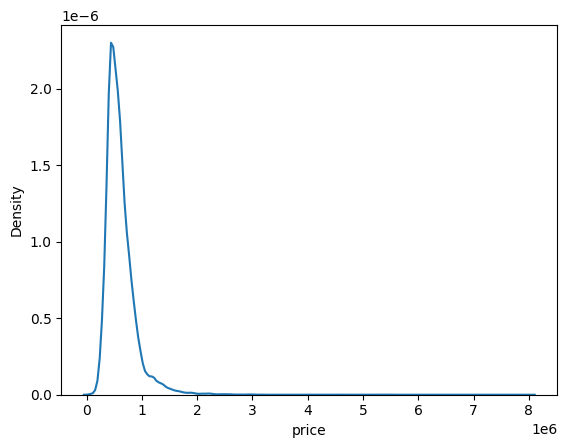

In [30]:
sns.kdeplot(df.price)

In [31]:
df['price_transformed'] = np.log(df.price)

In [32]:
df['price_transformed']

0        13.171154
1        12.577636
2        12.700769
3        12.847927
4        12.644328
           ...    
29575    13.122363
29576    13.235692
29577    13.049685
29578    13.286181
29579    13.560618
Name: price_transformed, Length: 29580, dtype: float64

In [38]:
df.head

<bound method NDFrame.head of                   datesold  postcode   price propertyType  bedrooms  \
0      2007-02-07 00:00:00      2607  525000        house         4   
1      2007-02-27 00:00:00      2906  290000        house         3   
2      2007-03-07 00:00:00      2905  328000        house         3   
3      2007-03-09 00:00:00      2905  380000        house         4   
4      2007-03-21 00:00:00      2906  310000        house         3   
...                    ...       ...     ...          ...       ...   
29575  2019-07-25 00:00:00      2900  500000         unit         3   
29576  2019-07-25 00:00:00      2612  560000         unit         2   
29577  2019-07-26 00:00:00      2912  464950         unit         2   
29578  2019-07-26 00:00:00      2601  589000         unit         2   
29579  2019-07-26 00:00:00      2612  775000         unit         2   

       price_transformed  
0              13.171154  
1              12.577636  
2              12.700769  
3        

In [33]:
list_2 = find_anamolies(df.price_transformed)

In [34]:
list_2

[]

In [35]:
len(list_2)

0

In [36]:
len(df)

29580

<Axes: xlabel='price_transformed', ylabel='Density'>

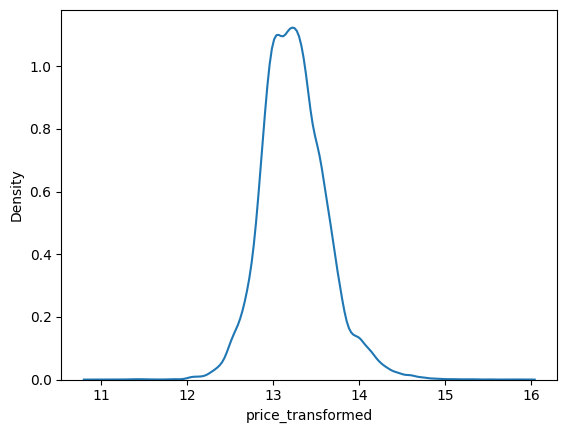

In [39]:
sns.kdeplot(df.price_transformed)

In [41]:
df['price_transformed_double'] = np.log(df.price_transformed)

In [42]:
df.price_transformed_double.skew()

np.float64(0.33092530655758573)

In [43]:
list_3 = find_anamolies(df.price_transformed_double)

In [44]:
len(list_3)

0

#### Anything below 40 or above 80 are considered as outliers.

## Boxplots

<Axes: >

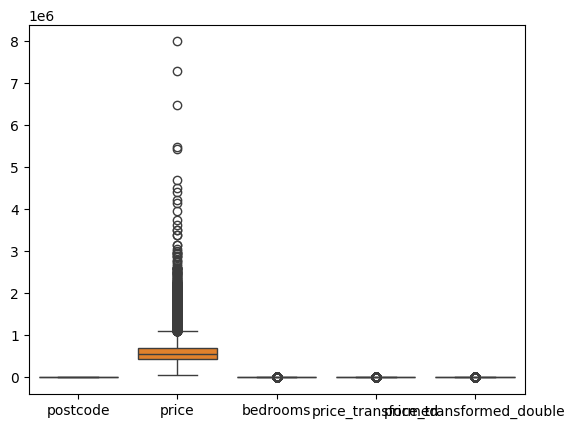

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.boxplot(data=df)

#### The above code displays the plot below

 - As you can see, it consideers everything above 75 or below -35 to be an outlier. The results are very close to method 1 above.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datesold                  29580 non-null  object 
 1   postcode                  29580 non-null  int64  
 2   price                     29580 non-null  int64  
 3   propertyType              29580 non-null  object 
 4   bedrooms                  29580 non-null  int64  
 5   price_transformed         29580 non-null  float64
 6   price_transformed_double  29580 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.6+ MB


In [47]:
df.describe()

postcode         price      bedrooms  price_transformed  \
count  29580.000000  2.958000e+04  29580.000000       29580.000000   
mean    2730.249730  6.097363e+05      3.250169          13.244695   
std      146.717292  2.817079e+05      0.951275           0.375214   
min     2600.000000  5.650000e+04      0.000000          10.941996   
25%     2607.000000  4.400000e+05      3.000000          12.994530   
50%     2615.000000  5.500000e+05      3.000000          13.217674   
75%     2905.000000  7.050000e+05      4.000000          13.465953   
max     2914.000000  8.000000e+06      5.000000          15.894952   

       price_transformed_double  
count              29580.000000  
mean                   2.583199  
std                    0.028183  
min                    2.392608  
25%                    2.564529  
50%                    2.581555  
75%                    2.600165  
max                    2.766002

## Inter Quartile Range

IQR = Q3 - Q1

In [49]:
list1 = [43,55,56,54,61,62,64,63,99,99,96,98,87,86,76,79,69,69]

In [50]:
list1

[43, 55, 56, 54, 61, 62, 64, 63, 99, 99, 96, 98, 87, 86, 76, 79, 69, 69]

In [51]:
len(list1)

18

In [52]:
max(list1)

99

In [53]:
min(list1)

43

In [54]:
import statistics 
statistics.mean(list1)

73.11111111111111

In [57]:
sorted(list1)

[43, 54, 55, 56, 61, 62, 63, 64, 69, 69, 76, 79, 86, 87, 96, 98, 99, 99]

To  find 90th percentile of these(ordered) scores, start by multiplying 90 percent times the total number of scores, which gives 90% * 18 